# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pickle

training_file = './train.p'
validation_file = './valid.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

total = len(X_train) + len(X_valid) + len(X_test)

print('Data has been loaded')

Data has been loaded


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import pandas as pd
from IPython.display import display

sign_names = pd.read_csv('./signnames.csv')

n_train = len(X_train)
n_valid = len(X_valid)
n_test = len(X_test)

image_shape = X_train.shape[1:]

n_classes = sign_names.shape[0]

df = pd.DataFrame(data = sign_names['SignName'])
                                  
print('Total dataset:', total)
print("Number of training examples = {} ({:.2f}% of total)".format(n_train, 100 * len(X_train) / total))
print("Number of validation examples = {} ({:.2f}% of total)".format(n_valid, 100 * len(X_valid) / total))
print("Number of testing examples = {} ({:.2f}% of total)".format(n_test, 100 * len(X_test) / total))
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

#for i in range(n_classes):
#    print('{}. {}'.format(i, sign_names['SignName'][i]))
    
display(df)

Total dataset: 51839
Number of training examples = 34799 (67.13% of total)
Number of validation examples = 4410 (8.51% of total)
Number of testing examples = 12630 (24.36% of total)
Image data shape = (32, 32, 3)
Number of classes = 43


,SignName
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)
9,No passing


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

----------------------------------------------------------------------------------------------------
Top 6 Most Occurring Signs:


,Name,Count
2,Speed limit (50km/h),2010
1,Speed limit (30km/h),1980
13,Yield,1920
12,Priority road,1890
38,Keep right,1860
10,No passing for vehicles over 3.5 metric tons,1800


----------------------------------------------------------------------------------------------------
Least 6 Occurring Signs:


,Name,Count
0,Speed limit (20km/h),180
37,Go straight or left,180
19,Dangerous curve to the left,180
32,End of all speed and passing limits,210
27,Pedestrians,210
41,End of no passing,210


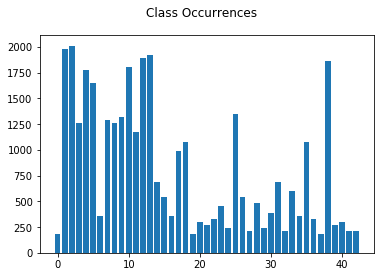

In [3]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def get_counts(data):
    labels, counts = np.unique(y_train, return_counts = True)
    return (labels, counts)
    
def get_top_bottom(data, few_count = 6):
    labels, counts = get_counts(data)
    df = pd.DataFrame(data = list(zip(sign_names['SignName'], counts)), columns = ["Name", "Count"])
    
    top = df.sort_values('Count', ascending = False)
    top_few = top[0:few_count]
    
    bottom = df.sort_values('Count', ascending = True)
    bottom_few = bottom[0:few_count]
    return (top_few, bottom_few)
    
def print_statistics(data):
    labels, counts = get_counts(data)
    
    plt.figure()
    plt.suptitle('Class Occurrences')
    plt.bar(labels, counts)

    count = 6
    top_few, bottom_few = get_top_bottom(data, count)
    
    print('-' * 100)
    print('Top {} Most Occurring Signs:'.format(count))
    display(top_few)
    
    print('-' * 100)
    print('Least {} Occurring Signs:'.format(count))
    display(bottom_few)
    
print_statistics(y_train)

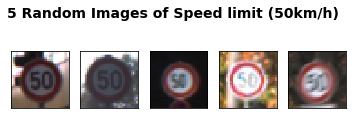

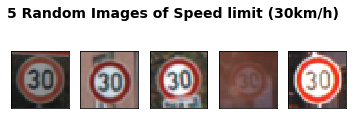

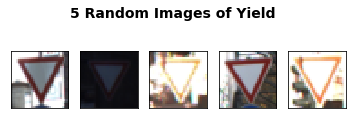

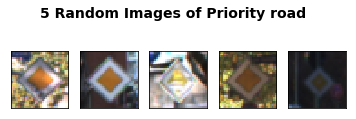

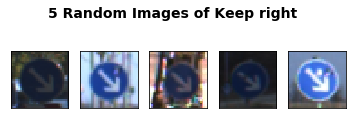

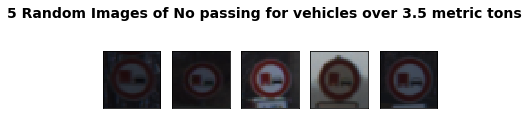

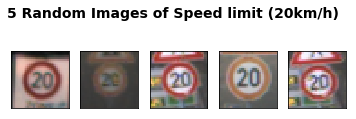

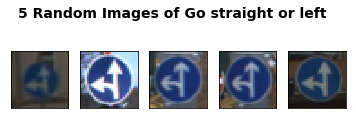

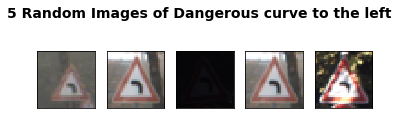

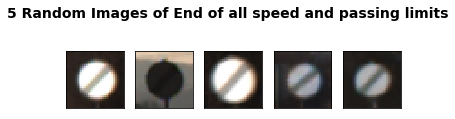

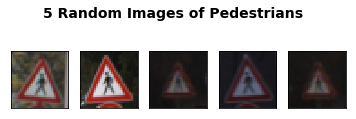

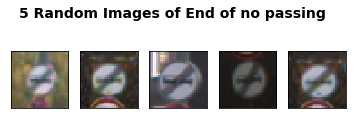

In [4]:
def show_random_images(data_few):
    for row_index,row in data_few.iterrows():
        fig = plt.figure(figsize=(6,6))
        fig.suptitle('5 Random Images of {}'.format(row['Name']), fontsize=14, fontweight='bold')

        images_index = np.argwhere(y_train == row_index)
        indices = np.random.choice(len(images_index), 5)

        for j in range(5):
            index = images_index[indices[j]][0]

            ax = plt.subplot(151 + j)

            plt.tick_params(
                axis='both',       
                which='both',      
                bottom='off',      
                top='off',         
                left='off', 
                right='off',
                labelbottom='off', labelleft='off')

            image = X_train[index]
            
            plt.imshow(image)
            plt.subplots_adjust(top=1.5)

def show_images(indices, data = X_train):
    n_images = len(indices)
    n_cols = 20
    n_rows = ceil(n_images / n_cols)

    for row in range(n_rows):
        fig = plt.figure(figsize=(20, 20))

        for i in range(n_cols):
            index = row * n_cols + i
            image_index = indices[index]
            image = data[image_index]

            fig.add_subplot(1, n_cols, 1 + i)
            plt.imshow(image)
            plt.axis('off')
            
# get list of top and least 6 categories
top_few, bottom_few = get_top_bottom(y_train, 6)

# display random images for the top 6 occuring categories
show_random_images(top_few)

# display random images for the least 6 occuring categories
show_random_images(bottom_few)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
import cv2

def increase_brightness(image):
    # mostly adopted from:
    # http://stackoverflow.com/questions/19363293/whats-the-fastest-way-to-increase-color-image-contrast-with-opencv-in-python-c
    maxIntensity = 255.0

    # Parameters for manipulating image data
    phi = 1
    theta = 1

    # Increase intensity such that
    # dark pixels become much brighter, 
    # bright pixels become slightly bright
    bright = (maxIntensity/phi)*(image/(maxIntensity/theta))**0.5
    bright = np.array(bright, dtype = np.uint8)
    return bright

def decrease_brightness(image):
    # mostly adopted from:
    # http://stackoverflow.com/questions/19363293/whats-the-fastest-way-to-increase-color-image-contrast-with-opencv-in-python-c
    maxIntensity = 255.0

    # Parameters for manipulating image data
    phi = 1
    theta = 1
    
    # Decrease intensity such that
    # dark pixels become much darker, 
    # bright pixels become slightly dark 
    dark = (maxIntensity/phi)*(image/(maxIntensity/theta))**2
    dark = np.array(dark, dtype = np.uint8)

    return dark

def rotate_image(image, degreesCCW, scaleFactor = 1):
    # mostly copied from http://stackoverflow.com/questions/11764575/
    # print('rotating image', scaleFactor, degreesCCW)
    (oldY,oldX) = image.shape[0], image.shape[1] #note: numpy uses (y,x) convention but most OpenCV functions use (x,y)
    M = cv2.getRotationMatrix2D(center=(oldX/2,oldY/2), angle=degreesCCW, scale=scaleFactor) #rotate about center of image.

    #choose a new image size.
    newX,newY = oldX*scaleFactor,oldY*scaleFactor
    #include this if you want to prevent corners being cut off
    r = np.deg2rad(degreesCCW)
    newX,newY = (abs(np.sin(r)*newY) + abs(np.cos(r)*newX),abs(np.sin(r)*newX) + abs(np.cos(r)*newY))

    #the warpAffine function call, below, basically works like this:
    # 1. apply the M transformation on each pixel of the original image
    # 2. save everything that falls within the upper-left "dsize" portion of the resulting image.

    #So I will find the translation that moves the result to the center of that region.
    (tx,ty) = ((newX-oldX)/2,(newY-oldY)/2)
    M[0,2] += tx #third column of matrix holds translation, which takes effect after rotation.
    M[1,2] += ty

    rotatedImg = cv2.warpAffine(image, M, dsize=(int(newX),int(newY)))
    
    diff = (np.array([rotatedImg.shape[0] - image.shape[0], rotatedImg.shape[1] - image.shape[1]]) / 2).astype(np.uint8)
    #print('Rotated shape: {} Diff: {}'.format(rotatedImg.shape, diff))
    rot_scaled_image = rotatedImg[diff[0]: diff[0] + 32, diff[1]: diff[1] + 32]

    return rot_scaled_image

def shift(images, dx):
    return np.roll(images, dx, axis=1)

def add_noise(image, noise_factor=30):
    noise = np.random.randint(0,noise_factor,image.shape).astype(np.uint8)
    image_noise = cv2.add(image, noise)
    return image_noise

def flatten_matrix(matrix):
    vector = matrix.flatten(1)
    vector = vector.reshape(1, len(vector))
    return vector

def zca_whitening(images):
    #http://stackoverflow.com/questions/31528800/how-to-implement-zca-whitening-python/31528936
    #http://stackoverflow.com/questions/41635737/is-this-the-correct-way-of-whitening-an-image-in-python
    #http://ufldl.stanford.edu/tutorial/unsupervised/ExercisePCAWhitening/
    X = images.reshape(-1, 32 * 32 * 3)
    X_norm = X - X.mean(axis=0)
    t = np.sqrt((X_norm ** 2).sum(axis=1))[:,None]
    X_norm /= t

    print('normalized')
    cov = np.cov(X, rowvar=True)   # cov is (N, N)
    print('cov generated')
    U,S,V = np.linalg.svd(cov)     # U is (N, N), S is (N,)
    print('svd')
    epsilon = 0.1  
    t1 = np.sqrt(S + epsilon)
    print('t1')
    t2 = np.diag(1.0/t1)
    print('t2')
    t3 = np.dot(t2, U.T)
    print('t3')
    zca_matrix = np.dot(U, t3)
    print('zca matrix done')
    zca = np.dot(zca_matrix, X_norm)    # zca is (N, 3072)
    print('zca done')
    return zca_matrix, zca

def show_zca_image(image):
    i = i.reshape((32,32,3))
    m,M = i.min(), i.max()
    plt.imshow((i - m) / (M - m))

def scale_image(image, size):
    image_s = cv2.resize(image, (size, size), interpolation = cv2.INTER_CUBIC)
    
    if size < image.shape[0]:
        # we need to pad
        diff = (np.array([image.shape[0] - size, image.shape[1] - size]) / 2).astype(np.uint8)
        bg = np.pad(image_s, (diff, diff, (0,0)), 'constant')
        assert(bg.shape[0] == 32 and bg.shape[1] == 32)
    else:
        # we need to just get 32 x 32
        #print('bigger image we need a smaller one')
        start = int((size - image.shape[0]) / 2)
        bg = image_s[start: start + 32, start: start + 32]
    return bg

## Generate data to compensate for over fitting

In [6]:
import numpy as np
import cv2
import os

def generate_extra(save_images = True):
    # figure out the maximum number of images for a category and then
    # try to generate more images for the rest of the categories to have a more
    # uniform distribution

    bins, classes_hist = np.unique(y_train, return_counts=True)
    classes_hist = np.array(list(zip(bins,classes_hist)))
    highest = np.max(classes_hist[:,1])

    # all possible functions to be applied on an image to generate more from the particular image
    ops = [lambda image: increase_brightness(scale_image(image, 36)), 
           lambda image: decrease_brightness(scale_image(image, 36)),
           lambda image: rotate_image(image, angle), 
           lambda image: rotate_image(image, -angle),
           lambda image: scale_image(image, 28),
           lambda image: add_noise(image),
           lambda image: shift(image, 2),
           lambda image: shift(image, -2)]

    X_generated = np.empty([0,32, 32, 3]).astype(np.uint8)
    y_generated = np.empty((0,1)).astype(np.uint8)

    for category, count in classes_hist:
        if save_images:
            folder = './gen_images/{}'.format(category)
            if not os.path.exists(folder):
                os.makedirs(folder)

        #print('Creating X_generated for the category')
        short = highest - count
        # we have 8 ways to generate more images from a given one
        # so max we can generate would be 
        possible = count * len(ops)
        required = min(possible, short)

        print("Generating {} for class {}".format(required, category))

        if required > 0:
            image_index = np.where(y_train == category)
            image_index = image_index[0]

            order = np.random.choice(count, required)
            op_index = 0

            for i in order:
                index = image_index[i]
                #print('Using image', index)
                image = np.copy(X_train[index])

                #print(index, op_index)
                image_generated = ops[op_index](image)

                if save_images:
                    file_name = '{}/{}-{}.jpg'.format(folder, index, op_index)
                    cv2.imwrite(file_name, image_generated)
                    #file_org = '{}/{}-org.jpg'.format(folder, index)
                    #cv2.imwrite(file_org, X_train[index])

                X_generated = np.vstack((X_generated, [image_generated]))
                y_generated = np.vstack((y_generated, [category]))

                angle = 10 + np.random.randint(10, size=1)

                op_index += 1
                if op_index >= len(ops):
                    op_index = 0

    with open('./generated.p', 'wb') as f:
        pickle.dump({'features':X_generated, 'labels': y_generated}, f)
        print('Saved generated data in generated.p')
        print('Images Shape:', X_generated.shape)
        print('Labels Shape:', y_generated.shape)

if not os.path.exists('./generated.p'):
    print('Generated images not found, generating...')
    generate_extra()

## Merge generated data with X_train

Number of original training examples = 34799
Extra generated: (49981, 32, 32, 3)
Combined training set: (84780, 32, 32, 3)


<Container object of 43 artists>

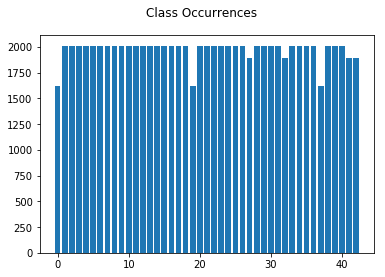

In [7]:
with open('./generated.p', 'rb') as f:
    data = pickle.load(f)
    X_generated = data['features']
    y_generated = data['labels']

X_train_comb = np.vstack((X_train, X_generated))
y_train_comb = np.append(y_train, y_generated.squeeze())

print("Number of original training examples = {}".format(X_train.shape[0]))
print('Extra generated:', X_generated.shape)
print('Combined training set:', X_train_comb.shape)
      
labels, counts = np.unique(y_train_comb, return_counts = True)

plt.figure()
plt.suptitle('Class Occurrences')
plt.bar(labels, counts)

## Normalize Data

In [8]:
def get_ycbcr(data):
    ycbcr = np.array([[[0.299],  [0.5]      , [-0.168736]],
                  [[0.587],  [-0.418688], [-0.331264]],
                  [[0.114],  [-0.081312], [0.5]]      
                 ]).squeeze()
    data_ycbcr = np.dot(data, ycbcr) + np.array([0,128,128])
    return data_ycbcr

def normalize_ycbcr(data, mean=None, sigma=None):
    data_ycbcr = get_ycbcr(data)
    #confirm_conversion()
    
    if mean == None or sigma == None:
        mean = [np.mean(data_ycbcr[:,:,:,0]), np.mean(data_ycbcr[:,:,:,(1,2)])]
        sigma = [np.std(data_ycbcr[:,:,:,0]), np.std(data_ycbcr[:,:,:,(1,2)])]
        print('Computed mean: {}, sigma: {}'.format(mean, sigma))
        
    #print('Values @ [0,0,0,0] in RGB Color Space:', data[0,0,0])
    #print('Values @ [0,0,0,0] in YCbCr Color Space:', data_ycbcr[0,0,0])
    
    data_ycbcr[:,:,:,0] -= mean[0]
    data_ycbcr[:,:,:,0] /= sigma[0] + 1e-7
    data_ycbcr[:,:,:,1:2] -= mean[1]
    data_ycbcr[:,:,:,1:2] /= sigma[1] + 1e-7
    
    #print('After norm[0,0,0,0]:', data_ycbcr[0,0,0])
    
    return data_ycbcr, mean, sigma

print('Normalizing X_train_comb')
X_train_norm, mean, sigma = normalize_ycbcr(X_train_comb)

print('Normalizing X_valid using mean from X_train')
X_valid_norm, _, _ = normalize_ycbcr(X_valid, mean, sigma)

print('Normalizing X_test using mean from X_train')
X_test_norm, _, _ = normalize_ycbcr(X_test, mean, sigma)

Normalizing X_train_comb
Computed mean: [82.127863942635699, 129.62260965042489], sigma: [67.035268483663856, 11.991955605319678]
Normalizing X_valid using mean from X_train
Normalizing X_test using mean from X_train


### Model Architecture

In [9]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

EPOCHS = 400
BATCH_SIZE = 128
learning_rate = 0.0008

tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, *image_shape], name='x')
y = tf.placeholder(tf.uint8, [None], name='y')
keep_prob = tf.placeholder(tf.float32, name='keep_prob')

one_hot_y = tf.one_hot(y, n_classes)

weights = { 
    'wc1': tf.get_variable("wc1", shape=[5,5,3,6], initializer=tf.contrib.layers.xavier_initializer()),
    'wc2': tf.get_variable("wc2", shape=[5,5,6,16], initializer=tf.contrib.layers.xavier_initializer()),
    'wn1': tf.get_variable("wn1", shape=[400,120], initializer=tf.contrib.layers.xavier_initializer()),
    'wn2': tf.get_variable("wn2", shape=[120,84], initializer=tf.contrib.layers.xavier_initializer()),
    'wn3': tf.get_variable("wn3", shape=[84,n_classes], initializer=tf.contrib.layers.xavier_initializer()),
}
bias = {
    'bc1' : tf.Variable(tf.zeros([6])),
    'bc2' : tf.Variable(tf.zeros([16])),
    'bn1' : tf.Variable(tf.zeros([120])),
    'bn2' : tf.Variable(tf.zeros([84])),
    'bn3' : tf.Variable(tf.zeros([n_classes]))
}

# Layer 1: Convolutional.
c1 = tf.nn.conv2d(x, weights['wc1'], strides=[1, 1, 1, 1], padding='VALID')
c1 = tf.nn.bias_add(c1, bias['bc1'])

# Activation.
c1 = tf.nn.relu(c1)

# Pooling. Input = 28x28x6. Output = 14x14x6.
p1 = tf.nn.max_pool(c1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

# Layer 2: Convolutional.
c2 = tf.nn.conv2d(p1, weights['wc2'], strides=[1, 1, 1, 1], padding='VALID')
c2 = tf.nn.bias_add(c2, bias['bc2'])

# Activation.
c2 = tf.nn.relu(c2)

# Pooling. Input = 10x10x16. Output = 5x5x16.
p2 = tf.nn.max_pool(c2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

# Flatten. Input = 5x5x16. Output = 400.
f1 = flatten(p2)

# Layer 3: Fully Connected. Input = 400. Output = 120.
n1 = tf.add(tf.matmul(f1, weights['wn1']), bias['bn1'])
n1 = tf.nn.relu(n1)

n1_drop = tf.nn.dropout(n1, keep_prob)

# Layer 4: Fully Connected. Input = 120. Output = 84.
n2 = tf.add(tf.matmul(n1_drop, weights['wn2']), bias['bn2'])
n2 = tf.nn.relu(n2)

n2_drop = tf.nn.dropout(n2, keep_prob)

# Layer 5: Fully Connected. Input = 84. Output = 43.
n3 = tf.add(tf.matmul(n2_drop, weights['wn3']), bias['bn3'])
logits = n3

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

# evaluate any tensor value on all dataset e.g. loss_function or accuracy
# No dropout is being used when evaluating. keep_prob is set to 1
def evaluate(tensor, X_data, y_data):
    n_data = len(X_data)
    total = 0
    
    sess = tf.get_default_session()
    
    for i in range(0, n_data, BATCH_SIZE):
        batch_x, batch_y = X_data[i: i + BATCH_SIZE], y_data[i : i + BATCH_SIZE]
        value = sess.run(tensor, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total += (value * len(batch_x))
    return total / n_data

def train(X_data, y_data, file_name = './lenet.ckpt', best_file_name = './lenet-best.ckpt'):
    saver = tf.train.Saver()
    
    print('Training, with rate: {:.3f}'.format(learning_rate))

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        n_rows = len(X_data)
        
        # for each EPOCH save the LOSS and Accuracy for both
        # validation set and input data
        
        indicators = { 'valid' : np.zeros((EPOCHS, 2)),
                       'data' : np.zeros((EPOCHS, 2)) }
        
        # keep track of the best accuracy algorithm has seen 
        best_accuracy = 0

        for e in range(EPOCHS):
            X_data, y_data = shuffle(X_data, y_data)

            for i in range(0, n_rows, BATCH_SIZE):
                batch_x, batch_y = X_data[i : i + BATCH_SIZE], y_data[i : i + BATCH_SIZE]
                sess.run(training_operation, 
                         feed_dict = {x: batch_x, y: batch_y, keep_prob: 0.5})

            valid_accuracy = evaluate(accuracy, X_valid_norm, y_valid)
            data_accuracy = evaluate(accuracy, X_data, y_data)

            valid_loss = evaluate(loss_operation, X_valid_norm, y_valid)
            data_loss = evaluate(loss_operation, X_data, y_data)

            indicators['data'][e] = [data_accuracy, data_loss]
            indicators['valid'][e] = [valid_accuracy, valid_loss]
            
            print('Epoch {}: Validation Accuracy: {:.3f}, Training Accuracy: {:.3f}'.format(
                e, valid_accuracy, data_accuracy))

            # save these weights if they are the best ones
            if valid_accuracy > best_accuracy:
                best_accuracy = valid_accuracy
                print('Saving best....')
                saver.save(sess, best_file_name)
                
        saver.save(sess, file_name)
        print('Done, best weights saved to: {}, last ones saved to: {}'.format(best_file_name, file_name))

    return indicators

print('Model has been defined')

Model has been defined


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
X_data = X_train_norm

print('Using X_data with shape:', X_data.shape)

indicators = train(X_train_norm, y_train_comb)
valid_accuracy, valid_loss = indicators['valid'][-1]
data_accuracy, data_loss = indicators['data'][-1]

print('Training completed')


Using X_data with shape: (84780, 32, 32, 3)
Training, with rate: 0.001
Epoch 0: Validation Accuracy: 0.402, Training Accuracy: 0.367
Saving best....
Epoch 1: Validation Accuracy: 0.470, Training Accuracy: 0.472
Saving best....
Epoch 2: Validation Accuracy: 0.490, Training Accuracy: 0.551
Saving best....
Epoch 3: Validation Accuracy: 0.551, Training Accuracy: 0.618
Saving best....
Epoch 4: Validation Accuracy: 0.581, Training Accuracy: 0.687
Saving best....
Epoch 5: Validation Accuracy: 0.649, Training Accuracy: 0.736
Saving best....
Epoch 6: Validation Accuracy: 0.730, Training Accuracy: 0.805
Saving best....
Epoch 7: Validation Accuracy: 0.748, Training Accuracy: 0.832
Saving best....
Epoch 8: Validation Accuracy: 0.779, Training Accuracy: 0.856
Saving best....
Epoch 9: Validation Accuracy: 0.780, Training Accuracy: 0.866
Saving best....
Epoch 10: Validation Accuracy: 0.829, Training Accuracy: 0.887
Saving best....
Epoch 11: Validation Accuracy: 0.841, Training Accuracy: 0.903
Saving 

Best Validation Accuracy: 0.960, Epoch: 390
Best Training Accuracy: 0.991, Epoch: 397


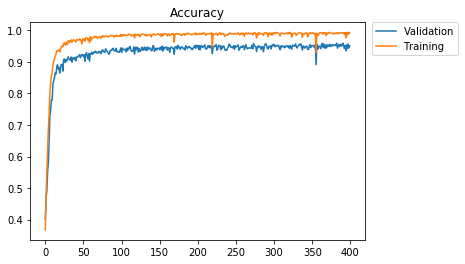

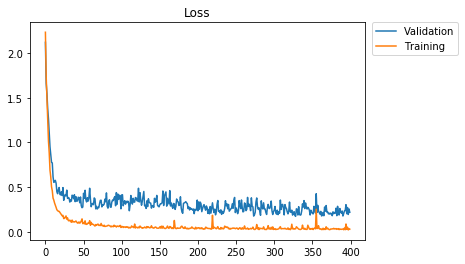

In [19]:
validation_accuracy = indicators['valid'][:,0]
validation_loss = indicators['valid'][:,1]

train_accuracy = indicators['data'][:,0]
train_loss = indicators['data'][:,1]

# figure out where we got the best accuracy

max_index = np.argmax(validation_accuracy)
max_train_index = np.argmax(train_accuracy)

print('Best Validation Accuracy: {:.3f}, Epoch: {}'.format(validation_accuracy[max_index], max_index))
print('Best Training Accuracy: {:.3f}, Epoch: {}'.format(train_accuracy[max_index], max_train_index))

epochs = range(len(validation_accuracy))

fig, ax = plt.subplots()
ax.plot(epochs, validation_accuracy, label='Validation')
ax.plot(epochs, train_accuracy, label='Training')
plt.title('Accuracy')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

fig, ax = plt.subplots()
ax.plot(epochs, validation_loss, label='Validation')
ax.plot(epochs, train_loss, label='Training')
plt.title('Loss')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)


## Test Set 

In [20]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    saver = tf.train.Saver()
    
    saver.restore(sess, './lenet-best.ckpt')
    
    test_accuracy = evaluate(accuracy, X_test_norm, y_test)
    valid_loss = evaluate(loss_operation, X_test_norm, y_test)

print('Test set accuracy: {:.3f}'.format(test_accuracy))


Test set accuracy: 0.943


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

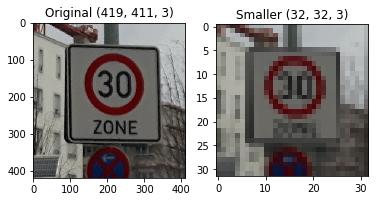

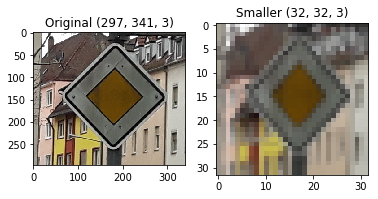

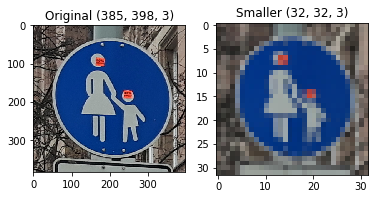

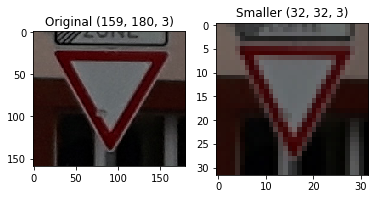

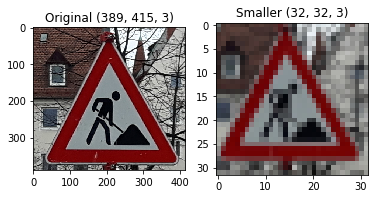

In [13]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

def show_realworld(file_name):
    plt.figure()
    plt.subplot(1,2,1)
    image = cv2.imread('real_world_test/{}-big.jpg'.format(file_name))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.title('Original {}'.format(image.shape))
    plt.imshow(image)
    
    plt.subplot(1,2,2)
    image = cv2.imread('real_world_test/{}.jpg'.format(file_name))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.title('Smaller {}'.format(image.shape))
    plt.imshow(image)
    return image

# images have been taken from the real world data captured by fellow Udacity student
# Sonja Krause-Harder

world_data = np.zeros((5, 32, 32 ,3)).astype(np.uint8)

for i in range(5):
    world_data[i] = show_realworld('t{}'.format(i+1))

### Predict the Sign Type for Each Image

Normalizing real world images using mean from X_train
Mean: [82.127863942635699, 129.62260965042489]
Sigma: [67.035268483663856, 11.991955605319678]

32 - End of all speed and passing limits
12 - Priority road
38 - Keep right
13 - Yield
25 - Road work


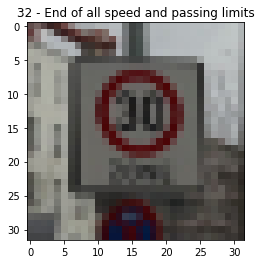

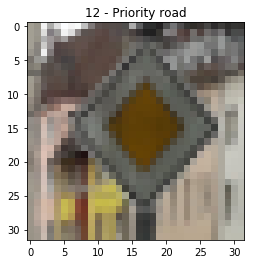

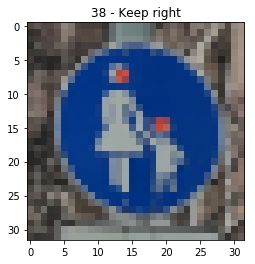

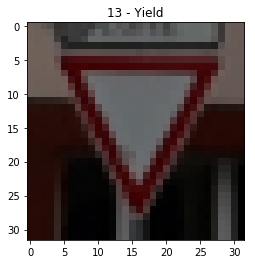

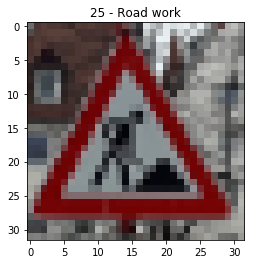

In [14]:
print('Normalizing real world images using mean from X_train')
print('Mean:', mean)
print('Sigma:', sigma)
print()
      
world_data_norm,_,_ = normalize_ycbcr(world_data, mean, sigma)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    saver = tf.train.Saver()
    saver.restore(sess, './lenet-best.ckpt')

    value = sess.run(logits, feed_dict = {x: world_data_norm, keep_prob: 1})
    
prediction = np.argmax(value, axis=1)

for index, category in enumerate(prediction):
    title = '{} - {}'.format(category, sign_names['SignName'][category])
    print(title)
    
    plt.figure()
    plt.imshow(world_data[index])
    plt.title(title)


### Analyze Performance

In [21]:
world_labels = np.array([1, 12, 27, 13, 25])
performance = np.mean(world_labels == prediction).astype(float)

print('Performance: {:.2f}%'.format(performance * 100))

Performance: 60.00%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

Image #: 0


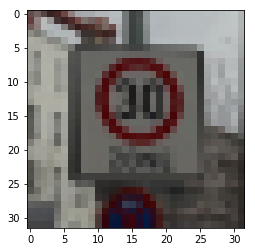

|Sign|Probability|
|----|-----------|
|End of all speed and passing limits|0.54|
|Keep right|0.43|
|Go straight or right|0.03|
|Priority road|0.00|
|Turn left ahead|0.00|


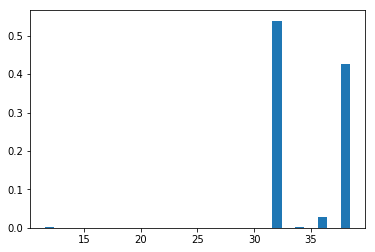

Image #: 1


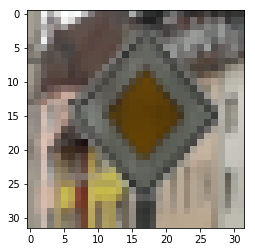

|Sign|Probability|
|----|-----------|
|Priority road|1.00|
|Speed limit (20km/h)|0.00|
|Speed limit (30km/h)|0.00|
|Speed limit (50km/h)|0.00|
|Speed limit (60km/h)|0.00|


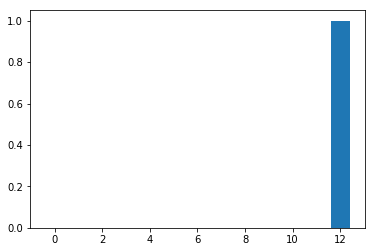

Image #: 2


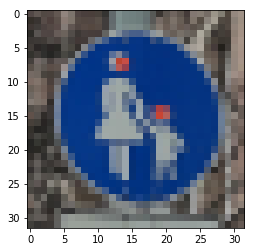

|Sign|Probability|
|----|-----------|
|Keep right|0.80|
|Turn left ahead|0.17|
|Priority road|0.02|
|Go straight or right|0.01|
|Ahead only|0.00|


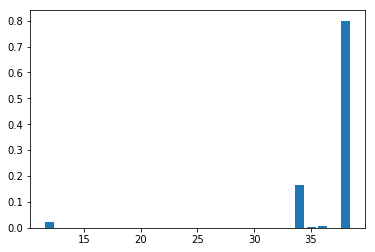

Image #: 3


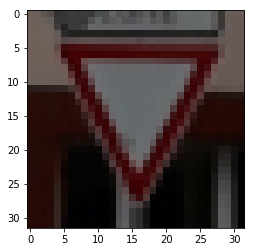

|Sign|Probability|
|----|-----------|
|Yield|1.00|
|Speed limit (20km/h)|0.00|
|Speed limit (30km/h)|0.00|
|Speed limit (50km/h)|0.00|
|Speed limit (60km/h)|0.00|


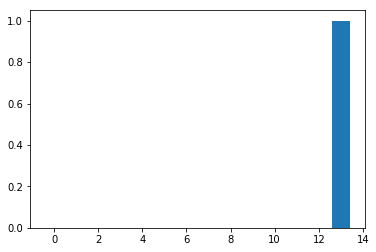

Image #: 4


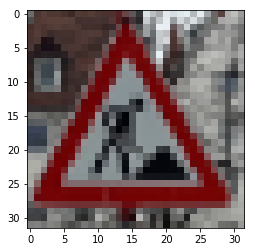

|Sign|Probability|
|----|-----------|
|Road work|1.00|
|Bumpy road|0.00|
|Road narrows on the right|0.00|
|Bicycles crossing|0.00|
|Speed limit (20km/h)|0.00|


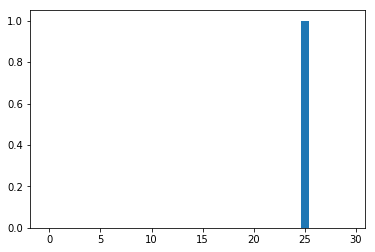

In [26]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver.restore(sess, './lenet-best.ckpt')

    top5 = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict = {x: world_data_norm, keep_prob: 1})

    indices = top5.indices
    values = top5.values
    
    for image_no, index in enumerate(indices):
        value = values[image_no]
        print('Image #:', image_no)
        plt.figure()
        plt.imshow(world_data[image_no])
        plt.show()
        
        # show category, its name and the probability
        print('|Sign|Probability|')
        print('|----|-----------|')
        for v_index, category in enumerate(index):
            print('|{}|{:.2f}|'.format(sign_names['SignName'][category], value[v_index]))
        
        plt.figure()
        plt.bar(index, values[image_no])
        plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


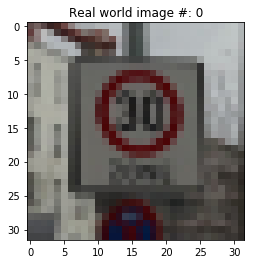

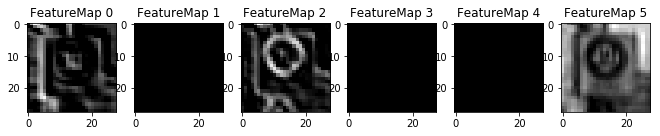

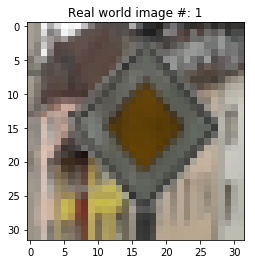

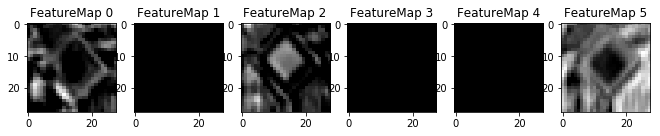

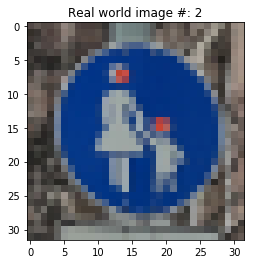

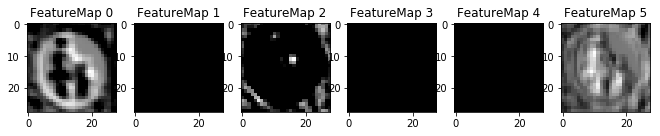

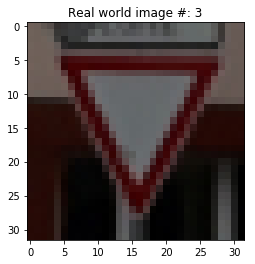

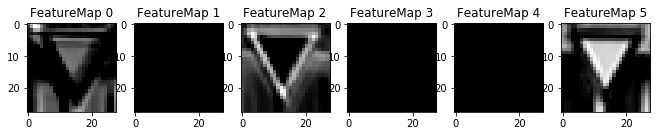

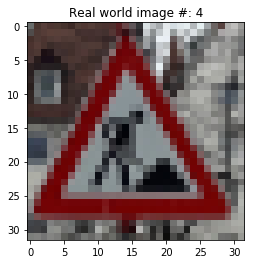

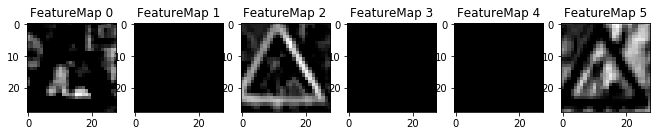

In [17]:
# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
    
    plt.show()
    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver.restore(sess, './lenet-best.ckpt')
    
    for i in range(5):
        plt.figure(i * 2)
        plt.imshow(world_data[i])
        plt.title('Real world image #: {}'.format(i))
        plt.show()

        image = world_data_norm[i].reshape(1,32,32,3)
        outputFeatureMap(image, c1, -1, -1, i * 2 + 1)
